In [3]:
# --- Celda 1: imports y carga de datos ---
import pandas as pd
import matplotlib.pyplot as plt

# Cargar resultados del benchmark
df = pd.read_csv("results.csv")

# Asegurarnos de que aborted sea booleano
df["aborted"] = df["aborted"].astype(bool)

df.head()

# poetry run jupyter notebook peg_solitaire/experiments/plots.ipynb

,heuristic,n,run,success,time,expanded,generated,max_frontier,solution_length,aborted
0,min_moves,3,1,True,0.870621,6983,9960,892,31.0,False
1,min_moves,3,2,True,0.920482,6983,9960,892,31.0,False
2,min_moves,3,3,True,0.925049,6983,9960,892,31.0,False
3,min_moves,3,4,True,0.934095,6983,9960,892,31.0,False
4,min_moves,3,5,True,0.945722,6983,9960,892,31.0,False


c:\Users\jcval\AppData\Local\pypoetry\Cache\virtualenvs\board-games-T72EZuaj-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9201 (\N{STOPWATCH}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


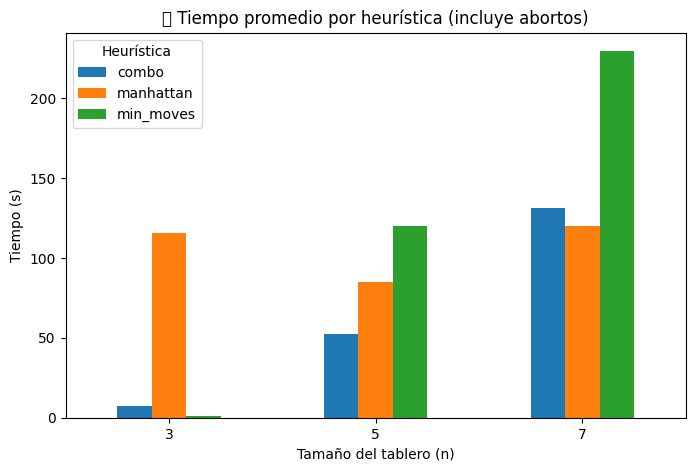

In [4]:
# --- Celda 2: Tiempo de ejecución promedio (incluye abortos) ---
times = df.groupby(["n", "heuristic"])["time"].mean().unstack()

times.plot(kind="bar", figsize=(8,5))
plt.title("⏱ Tiempo promedio por heurística (incluye abortos)")
plt.ylabel("Tiempo (s)")
plt.xlabel("Tamaño del tablero (n)")
plt.xticks(rotation=0)
plt.legend(title="Heurística")
plt.show()


c:\Users\jcval\AppData\Local\pypoetry\Cache\virtualenvs\board-games-T72EZuaj-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 9989 (\N{WHITE HEAVY CHECK MARK}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


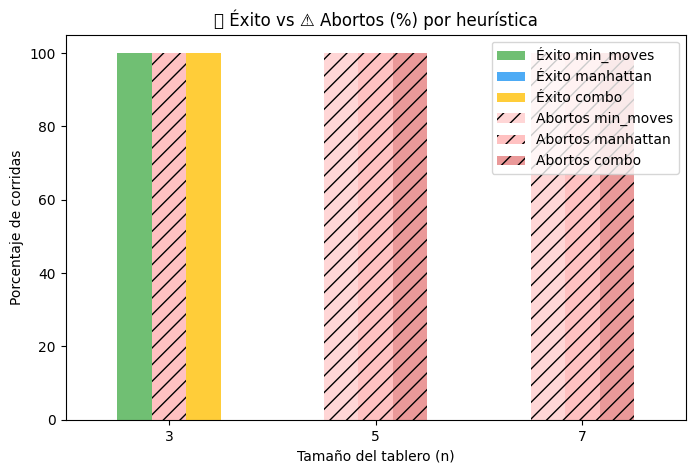

In [6]:
# --- Celda 3: Tasa de éxito y abortos (barras apiladas) ---
success = df.groupby(["n", "heuristic"])["success"].mean().unstack() * 100
abort = df.groupby(["n", "heuristic"])["aborted"].mean().unstack() * 100

fig, ax = plt.subplots(figsize=(8,5))

# Graficar éxitos
success.plot(kind="bar", ax=ax, stacked=False, alpha=0.8,
             color=["#4CAF50","#2196F3","#FFC107"])

# Graficar abortos encima, con hatch para distinguir
abort.plot(kind="bar", ax=ax, stacked=False, alpha=0.4,
           color=["#FF9999","#FF6666","#CC0000"], hatch="//")

plt.title("✅ Éxito vs ⚠️ Abortos (%) por heurística")
plt.ylabel("Porcentaje de corridas")
plt.xlabel("Tamaño del tablero (n)")
plt.xticks(rotation=0)
plt.legend(["Éxito min_moves","Éxito manhattan","Éxito combo",
            "Abortos min_moves","Abortos manhattan","Abortos combo"], loc="upper right")
plt.show()



c:\Users\jcval\AppData\Local\pypoetry\Cache\virtualenvs\board-games-T72EZuaj-py3.12\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128230 (\N{PACKAGE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


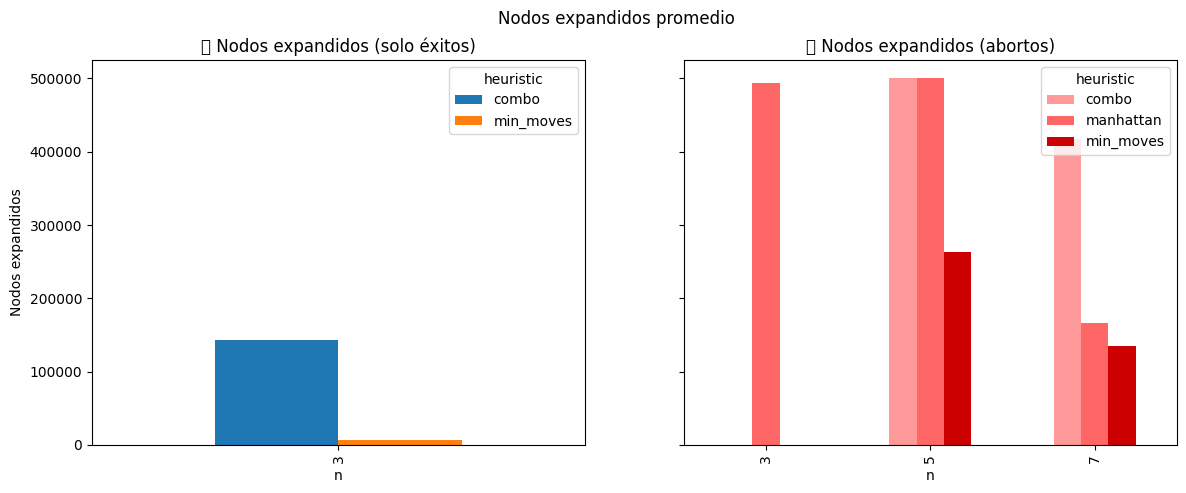

In [7]:
# --- Celda 4: Nodos expandidos promedio (éxitos y abortos separados) ---
expanded_success = df[df["success"]==True].groupby(["n","heuristic"])["expanded"].mean().unstack()
expanded_abort = df[df["aborted"]==True].groupby(["n","heuristic"])["expanded"].mean().unstack()

fig, ax = plt.subplots(1,2, figsize=(14,5), sharey=True)

expanded_success.plot(kind="bar", ax=ax[0])
ax[0].set_title("📦 Nodos expandidos (solo éxitos)")
ax[0].set_ylabel("Nodos expandidos")

expanded_abort.plot(kind="bar", ax=ax[1], color=["#FF9999","#FF6666","#CC0000"])
ax[1].set_title("📦 Nodos expandidos (abortos)")
ax[1].set_ylabel("Nodos expandidos")

plt.suptitle("Nodos expandidos promedio")
plt.show()


In [8]:
# --- Celda 5: Resumen tabular ---
summary = df.groupby(["n", "heuristic"]).agg(
    runs=("run", "count"),
    success_rate=("success", "mean"),
    abort_rate=("aborted", "mean"),
    avg_time=("time", "mean"),
    avg_expanded=("expanded", "mean")
)
summary


runs  success_rate  abort_rate    avg_time  avg_expanded
n heuristic                                                          
3 combo         5           1.0         0.0    7.119713      143387.0
  manhattan     5           0.0         1.0  115.913609      493983.2
  min_moves     5           1.0         0.0    0.919194        6983.0
5 combo         5           0.0         1.0   52.471285      500001.0
  manhattan     5           0.0         1.0   85.157841      500001.0
  min_moves     5           0.0         1.0  120.001109      263070.0
7 combo         5           0.0         1.0  131.067108      417298.6
  manhattan     5           0.0         1.0  120.000948      166638.4
  min_moves     5           0.0         1.0  229.470027      135362.4